In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nomeArquivo = "teste" #Sem extensao
df = pd.read_table (nomeArquivo+".txt", sep='\s+')
df["tempoTotal"] = df.apply (lambda row: row["Recebido"] - row["Enviado"], axis=1)
df["tempoRegra"] = df.apply (lambda row: row["tempoTotal"] / row["Regras"], axis=1)
df.set_index(['Execucao', 'Regras','Indice'], inplace=True)
#df.set_index(['Execucao', 'Regras'], inplace=True) 
df

Enviado     Recebido   tempoTotal  tempoRegra
Execucao Regras Indice                                                   
1        250    1          8.776887    13.093014     4.316127    0.017265
         500    1         16.266657    26.562795    10.296138    0.020592
         750    1         29.824126    51.201919    21.377793    0.028504
         1000   1         54.541084    88.099609    33.558525    0.033559
         1250   1         91.551597   143.683448    52.131851    0.041705
         1500   1        147.206243   217.132429    69.926186    0.046617
         1750   1        220.747173   320.863927   100.116754    0.057210
         2000   1        324.574773   504.986139   180.411366    0.090206
         2250   1        508.800643   799.391925   290.591282    0.129152
2        250    1         10.878861    16.260098     5.381237    0.021525
         500    1         19.433257    32.029806    12.596549    0.025193
         750    1         35.285650    52.899469    17.613819    0.023485
         1000   1         56.289846    86.499616    30.209770    0.030210
         1250   1         89.952228   138.825194    48.872966    0.039098
         1500   1        142.348056   214.881697    72.533641    0.048356
         1750   1        218.494285   337.371503   118.877218    0.067930
         2000   1        341.079050   520.437202   179.358152    0.089679
         2250   1        524.291203   792.355416   268.064213    0.119140
3        250    1          4.064221     8.730941     4.666720    0.018667
         500    1         11.910840    21.743198     9.832358    0.019665
         750    1         25.003568    44.766509    19.762941    0.026351
         1000   1         48.120678    76.764045    28.643367    0.028643
         1250   1         80.205770   129.372468    49.166698    0.039333
         1500   1        132.889810   208.098589    75.208779    0.050139
         1750   1        211.744629   327.556860   115.812231    0.066178
         2000   1        331.310850   499.725376   168.414526    0.084207
         2250   1        503.627323   763.528906   259.901583    0.115512
1        250    2          5.612641    11.043818     5.431177    0.021725
         500    2         14.222589    25.319847    11.097258    0.022195
         750    2         28.585706    49.612605    21.026899    0.028036
...                             ...          ...          ...         ...
3        1750   2        230.407481   340.353630   109.946149    0.062826
         2000   2        344.071538   514.602126   170.530588    0.085265
         2250   2        518.428447   794.177041   275.748594    0.122555
1        250    3          4.962562    53.318269    48.355707    0.193423
         500    3         54.492926   252.827020   198.334094    0.396668
         750    3        254.086948   625.620549   371.533601    0.495378
         1000   3        626.965559  1204.379948   577.414389    0.577414
         1250   3       1205.813423  1996.910692   791.097269    0.632878
         1500   3       1998.432323  2994.686373   996.254050    0.664169
         1750   3       2996.305926  4315.233586  1318.927660    0.753673
         2000   3       4316.958057  5890.563200  1573.605143    0.786803
         2250   3       6014.741965  8719.345104  2704.603139    1.202046
2        250    3          2.617029    50.869539    48.252510    0.193010
         500    3         52.041092   250.561101   198.520009    0.397040
         750    3        251.813042   621.197669   369.384627    0.492513
         1000   3        622.533256  1201.199565   578.666309    0.578666
         1250   3       1202.638182  1974.744532   772.106350    0.617685
         1500   3       1976.269481  2946.382127   970.112646    0.646742
         1750   3       2947.999409  4245.773207  1297.773798    0.741585
         2000   3       4247.490016  6118.950179  1871.460163    0.935730
         2250   3       6120.877655  8733.971100  2613.093445    1.161375
3        250    3          1.488

In [3]:
gpb = df.groupby (["Regras","Indice"])
#gpb = df.groupby (["Regras"])

In [4]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

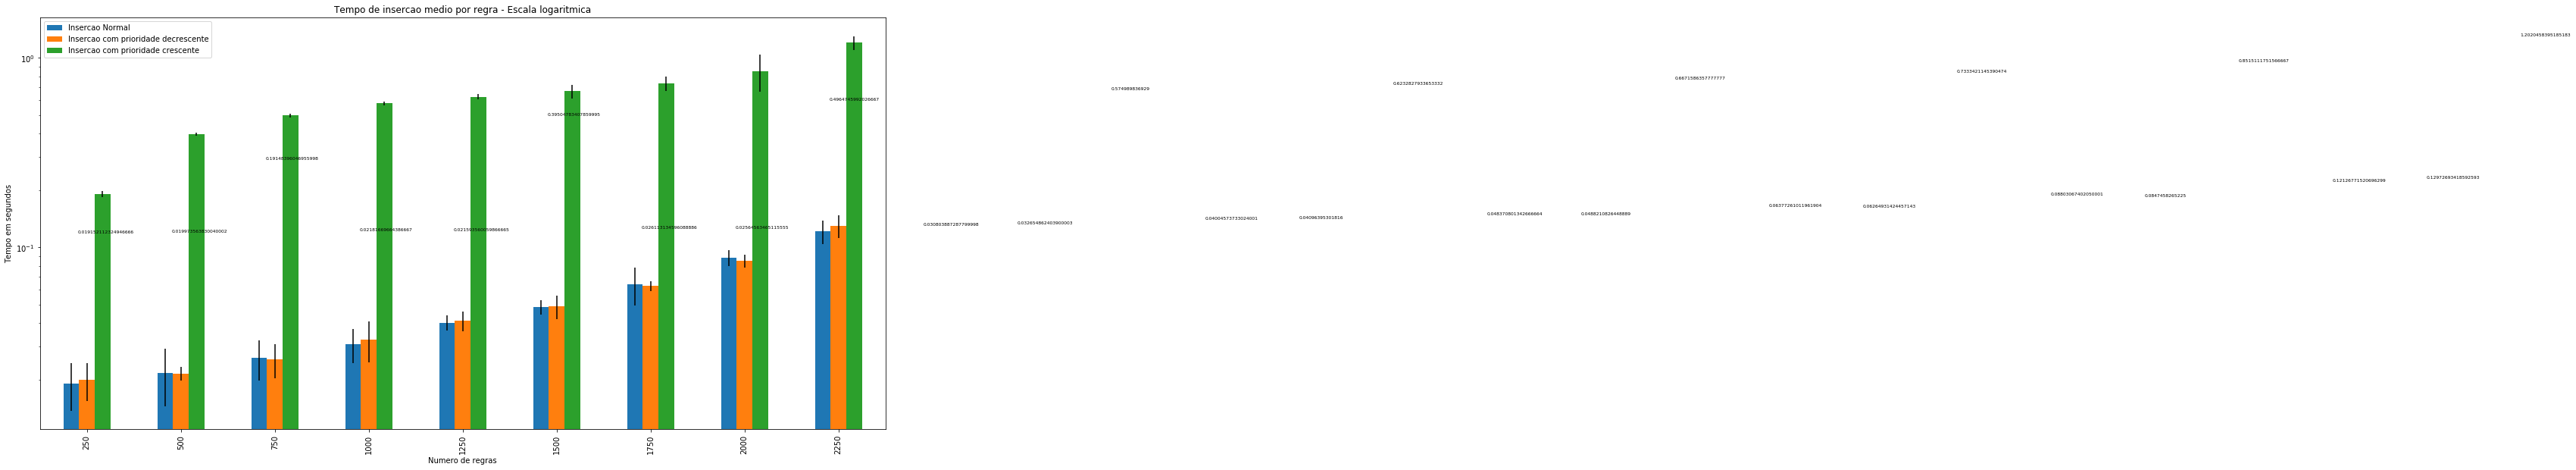

In [10]:
# Grafico da porcentagem de perda de pacotes em relação aos pacotes transmitidos no slice
err = gpb.aggregate(confinterval)
media = gpb.mean()
err = err.filter(items=['tempoRegra'])
media = media.filter(items=['tempoRegra'])
media.unstack().sort_values(by=["Regras"]).plot (logy=True, kind='bar', yerr=err.unstack(), title="Tempo de insercao medio por regra - Escala logaritmica", rot=90, figsize=(20,10))
plt.xlabel('Numero de regras')
plt.ylabel('Tempo em segundos')
#for i, v in enumerate(media['tempoRegra']):
#    plt.text(i-0.1,0.02, str("%.3f" %v), color='black', fontweight='bold', rotation=90, size=6) #i-0.5 v+1

for i in range(len(media)):
    plt.text(x = i-0.1 , y = media['tempoRegra'][i]+0.1, s = media['tempoRegra'][i], size = 6)

#props = dict(boxstyle='round', facecolor='blue', alpha=0.15)
#ax=plt.gca()
#ax.text(0.015, 0.95, '1- Insercao Normal\n2- Insercao com prioridade decrescente\n3- Insercao com prioridade crescente', transform=ax.transAxes, fontsize=14,
#        verticalalignment='top', bbox=props)
plt.gca().legend(['Insercao Normal','Insercao com prioridade decrescente','Insercao com prioridade crescente'])
plt.savefig(nomeArquivo+".pdf")
plt.show()